In [5]:
#conducted at 523K (250 C)
#super scheme composed of 6 different hydrothermal liquefaction subschemes
#schemes = (1) glycine, (2) glycine and formaldehyde, (3) glycine and furaldehyde, (4) glycine and glyceraldehyde, (5) glycine and dicarbonyl, (6) dehydration of 2 glycine 
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import  matplotlib.pyplot as plt

import numpy as np

def kvalue (parameters, temp):
    #parameters = A, n, Ea
    klist = []
    for kval in parameters: 
        k = kval[0]*(temp**kval[1])*np.exp(-kval[2] / 8.314e-3 / temp)
        klist.append(k)
    return klist
  
#values from CBS-QB3 computational methods 
#k in units of s^-1 (1st order) and M^-1*s^-1 (2nd order)
kvals1 = kvalue([ [2.44e-79, 27.34, 268.01], [1.84e4, 1.53, 85.14], [4.04e1, 3.04, 358.71], [4.66e6, 2.07, 393.87], [1.10e-24, 11.07, 235.33] ], 573)
kvals2 = kvalue([ [4.66e-5, 4.29, 88.83], [1.01e-6, 5.71, 203.37], [3.04e-1, 2.69, 94.53], [4.62e-33, 13.58, 206.41], [6.23e1, 3.12, 182.47], [5.87e2, 2.86, 138.68] ], 573)
kvals3 = kvalue([ [1.29e-6, 4.65, 93.62], [3.31e18,-1.57,225.87], [5.66e-2, 2.32, 100.17], [1.27e-31, 13.03, 208.74], [2.96e-7, 5.86, 285.792], [3.76e-1, 3.48, 176.94], [4.63e12, -0.055, 154.02] ], 573)
kvals4 = kvalue([ [1.53e1, 2.21, 84.64], [7.96e8, 0.91, 214.09], [4.46e1, -0.67, 106.51], [5.68e-14, 8.42, 215.13], [7.61e-1, 3.43, 246.31], [3.15e-30, 12.83, 188.58], [1.77e16, -1.13, 124.05], [5.45e-47, 18.11, 165.26] ], 573)
kvals5 = kvalue([ [7.76e-4, 3.75, 69.39], [9.33e17, -1.31, 270.15], [1.37e12, -0.25, 137.59], [1.35e-29, 12.66, 154.80], [4.02e-20, 9.16, 139.64], [3.61e13, -0.24, 166.17], [5.73e-7, 4.44, 90.18], [8.34e9, -0.15, 129.51], [2.45e15, -0.35, 226.91], [1.14e13, 0.44, 12.72] ], 573)
kvals6 = kvalue([ [2.02e-1, 2.87, 148.62], [1.67e6, 1.23, 260.62] ], 573)

    
#print("kvals1:", kvals1)
#print("kvals2:", kvals2)
#print("kvals3:", kvals3)
#print("kvals4:", kvals4)
#print("kvals5:", kvals5)
#print("kvals6:", kvals6)

def HTL (x, t): 
    
    #k values for reactions 1-5 in scheme 1
    kr11 = kvals1[0]
    kr12 = kvals1[1]
    kr13 = kvals1[2]
    kr14 = kvals1[3]
    kr15 = kvals1[4]
    
    #k values for reactions 1-6 in scheme 2
    kr21 = kvals2[0]
    kr22 = kvals2[1]
    kr23 = kvals2[2]
    kr24 = kvals2[3]
    kr25 = kvals2[4]
    kr26 = kvals2[5]
    
    #k values for reactions 1-7 in scheme 3
    kr31 = kvals3[0]
    kr32 = kvals3[1]
    kr33 = kvals3[2]
    kr34 = kvals3[3]
    kr35 = kvals3[4]
    kr36 = kvals3[5]
    kr37 = kvals3[6]
    
    #k values for reactions 1-8 in scheme 4
    kr41 = kvals4[0]
    kr42 = kvals4[1]
    kr43 = kvals4[2]
    kr44 = kvals4[3]
    kr45 = kvals4[4]
    kr46 = kvals4[5]
    kr47 = kvals4[6]
    kr48 = kvals4[7]
    
    #k values for reactions 1-10 in scheme 5
    kr51 = kvals5[0]
    kr52 = kvals5[1]
    kr53 = kvals5[2]
    kr54 = kvals5[3]
    kr55 = kvals5[4]
    kr56 = kvals5[5]
    kr57 = kvals5[6]
    kr58 = kvals5[7]
    kr59 = kvals5[8]
    kr510 = kvals5[9]
    
    #k values for reactions 1 and 2 in scheme 6
    kr61 = kvals6[0]
    kr62 = kvals6[1]
    
    
    #dx/dt values for all of the different molecules across all schemes and pathways
 
    d1dt = -(kr11)*x[0]-(kr13)*x[0]*x[2]-(kr14)*x[0]*x[1]-(kr15)*x[0]-(kr21)*x[0]*x[1]-(kr31)*x[0]*x[17]-(kr41)*x[0]*x[25]+(kr48)*x[31]-(kr51)*x[0]*x[34]-(kr61)*x[0]*x[0]
    
    d2dt = (kr11)*x[0]-(kr14)*x[0]*x[1]-(kr21)*x[0]*x[1]
    
    d3dt = -(kr13)*x[0]*x[2]+(kr22)*x[12]-(kr25)*x[2]*x[15]+(kr32)*x[18]-(kr36)*x[22]*x[2]+(kr42)*x[26]+(kr52)*x[35]-(kr55)*x[38]*x[2]+(kr59)*x[42]+(kr510)*x[43]+(kr61)*x[0]*x[0]+(kr62)*x[45]
    
    d4dt = (kr13)*x[0]*x[2]+(kr14)*x[0]*x[1]
    
    d5dt = (kr15)*x[0]+(kr24)*x[13]+(kr34)*x[19]+(kr53)*x[36]
    
    d6dt = (kr11)*x[0] - (kr12)*x[5]*x[6]
    
    d7dt = -(kr12)*x[5]*x[6]-(kr23)*x[13]*x[6]-(kr33)*x[19]*x[6] - (kr43)*x[27]*x[6]
    
    d8dt = (kr13)*x[0]*x[2]
    
    d9dt = (kr14)*x[0]*x[1]+(kr26)*x[16]
    
    d10dt = (kr15)*x[0]
    
    d11dt = (kr12)*x[5]*x[6]
    
    d12dt = (kr26)*x[16]+(kr37)*x[23]+(kr56)*x[39]
    
    d13dt = (kr21)*x[0]*x[1] - (kr22)*x[12]
    
    d14dt = (kr22)*x[12]-(kr23)*x[13]*x[6]-(kr24)*x[13]
    
    d15dt = (kr23)*x[13]*x[6]
    
    d16dt = (kr24)*x[13]-(kr25)*x[15]*x[2]
    
    d17dt = (kr25)*x[15]*x[2] - (kr26)*x[16]
    
    d18dt = -(kr31)*x[0]*x[17]
    
    d19dt = (kr31)*x[0]*x[17] - (kr32)*x[18]
    
    d20dt = (kr32)*x[18] - (kr33)*x[19]*x[6] -(kr34)*x[19]
    
    d21dt = (kr33)*x[19]*x[6]
    
    d22dt = (kr34)*x[19] - (kr35)*x[21]
    
    d23dt = (kr35)*x[21] - (kr36)*x[22]*x[2]
    
    d24dt = (kr36)*x[22]*x[2] - (kr37)*x[23]
    
    d25dt = (kr37)*x[23]
    
    d26dt = -(kr41)*x[0]*x[25]
    
    d27dt = (kr41)*x[0]*x[25] - (kr42)*x[26]
    
    d28dt = (kr42)*x[26] - (kr43)*x[27]*x[6] - (kr44)*x[27]
    
    d29dt = (kr43)*x[27]*x[6]
    
    d30dt = (kr44)*x[27] - (kr45)*x[29]
    
    d31dt = (kr45)*x[29] - (kr46)*x[30]
    
    d32dt = (kr46)*x[30] - (kr47)*x[31]
    
    d33dt = (kr47)*x[31] - (kr48)*x[32]
    
    d34dt = (kr48)*x[32]
    
    d35dt = -(kr51)*x[0]*x[34]
    
    d36dt = (kr51)*x[0]*x[34] - (kr52)*x[35]
    
    d37dt = (kr52)*x[35] - (kr53)*x[36]
    
    d38dt = (kr53)*x[36] - (kr54)*x[37]
    
    d39dt = (kr54)*x[37] - (kr55)*x[38]*x[2]
    
    d40dt = (kr55)*x[38]*x[2] - (kr56)*x[39]
    
    d41dt = (kr56)*x[39] - (kr57)*x[40]*x[40]
    
    d42dt = (kr57)*x[40]*x[40] - (kr58)*x[41]
    
    d43dt = (kr58)*x[41] - (kr59)*x[42]
    
    d44dt = (kr59)*x[42] - (kr510)*x[43]
    
    d45dt = (kr510)*x[43]
    
    d46dt = (kr61)*x[0]*x[0] - (kr62)*x[45]
    
    d47dt = (kr62)*x[45]
    
    
    
    
    #print([dxpdt, dxcdt, dxldt, dxAPdt, dxBCdt, dxGasdt])
    return [d1dt, d2dt, d3dt, d4dt, d5dt, d6dt, d7dt, d8dt, d9dt, d10dt, d11dt, d12dt, d13dt, d14dt, d15dt, d16dt, d17dt, d18dt, d19dt, d20dt, d21dt, d22dt, d23dt, d24dt, d25dt, d26dt, d27dt, d28dt, d29dt, d30dt, d31dt, d32dt, d33dt, d34dt, d35dt, d36dt, d37dt, d38dt, d39dt, d40dt, d41dt, d42dt, d43dt, d44dt, d45dt, d46dt, d47dt]



    

Text(0.5, 1.0, 'Mole Fraction. vs. Time for HTL of Microalgae Components')

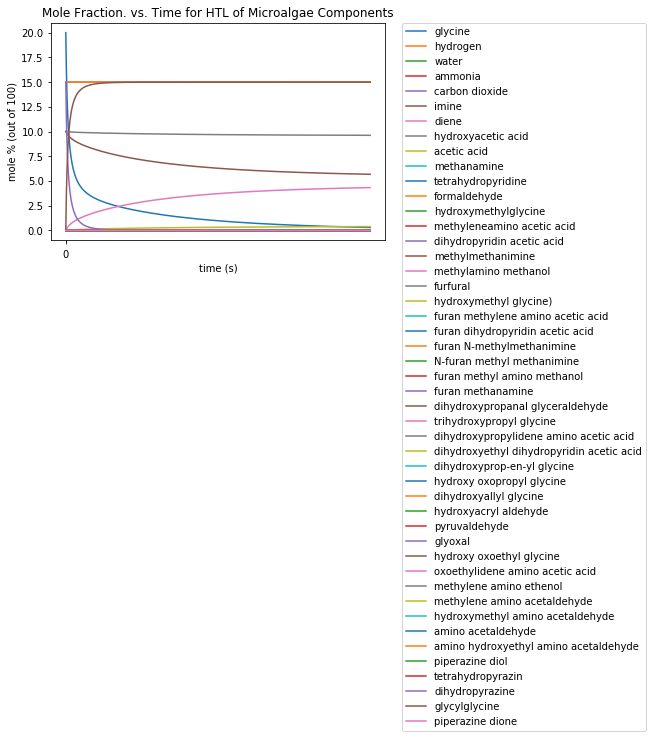

In [6]:
# linspace from t=0 to x seconds, y intervals
t = np.linspace(0, 1, 2000)


#Algae has between: 6-20% protein, 33-64% carbohydrate, and 11-21% lipid.
#initial reactant compounds: glycine(1) (protein), water(3) (carb), 1,3butadiene(7) (lipid), formaldehyde(12) (carb), furfural(18) (carb), glyceraldehyde(26) (carb), glyoxal(35) (carb)

x0 = [20, 0, 15, 0, 0, 0, 15, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
concentration = odeint(HTL, x0, t)

x1 = concentration[: , 0]
x2 = concentration[: , 1]
x3 = concentration[: , 2]
x4 = concentration[: , 3]
x5 = concentration[: , 4]
x6 = concentration[: , 5]
x7 = concentration[: , 6]
x8 = concentration[: , 7] 
x9 = concentration[: , 8]
x10 = concentration[: , 9]
x11 = concentration[: , 10]
x12 = concentration[: , 11]
x13 = concentration[: , 12]
x14 = concentration[: , 13]
x15 = concentration[: , 14]
x16 = concentration[: , 15]
x17 = concentration[: , 16]
x18 = concentration[: , 17]
x19 = concentration[: , 18]
x20 = concentration[: , 19]
x21 = concentration[: , 20]
x22 = concentration[: , 21]
x23 = concentration[: , 22]
x24 = concentration[: , 23]
x25 = concentration[: , 24]
x26 = concentration[: , 25]
x27 = concentration[: , 26]
x28 = concentration[: , 27]
x29 = concentration[: , 28]
x30 = concentration[: , 29]
x31 = concentration[: , 30]
x32 = concentration[: , 31]
x33 = concentration[: , 32]
x34 = concentration[: , 33]
x35 = concentration[: , 34]
x36 = concentration[: , 35]
x37 = concentration[: , 36]
x38 = concentration[: , 37]
x39 = concentration[: , 38]
x40 = concentration[: , 39]
x41 = concentration[: , 40]
x42 = concentration[: , 41]
x43 = concentration[: , 42]
x44 = concentration[: , 43]
x45 = concentration[: , 44]
x46 = concentration[: , 45]
x47 = concentration[: , 46]


plt.plot(t, x1, label="glycine")
plt.plot(t, x2, label="hydrogen")
plt.plot(t, x3, label="water")
plt.plot(t, x4, label="ammonia")
plt.plot(t, x5, label="carbon dioxide")
plt.plot(t, x6, label="imine")
plt.plot(t, x7, label="diene")
plt.plot(t, x8, label="hydroxyacetic acid")
plt.plot(t, x9, label="acetic acid")
plt.plot(t, x10, label="methanamine")
plt.plot(t, x11, label="tetrahydropyridine")
plt.plot(t, x12, label="formaldehyde")
plt.plot(t, x13, label="hydroxymethylglycine")
plt.plot(t, x14, label="methyleneamino acetic acid")
plt.plot(t, x15, label="dihydropyridin acetic acid")
plt.plot(t, x16, label="methylmethanimine")
plt.plot(t, x17, label="methylamino methanol")
plt.plot(t, x18, label="furfural")
plt.plot(t, x19, label="hydroxymethyl glycine)")
plt.plot(t, x20, label="furan methylene amino acetic acid")
plt.plot(t, x21, label="furan dihydropyridin acetic acid")
plt.plot(t, x22, label="furan N-methylmethanimine")
plt.plot(t, x23, label="N-furan methyl methanimine")
plt.plot(t, x24, label="furan methyl amino methanol")
plt.plot(t, x25, label="furan methanamine")
plt.plot(t, x26, label="dihydroxypropanal glyceraldehyde")
plt.plot(t, x27, label="trihydroxypropyl glycine")
plt.plot(t, x28, label="dihydroxypropylidene amino acetic acid")
plt.plot(t, x29, label="dihydroxyethyl dihydropyridin acetic acid")
plt.plot(t, x30, label="dihydroxyprop-en-yl glycine")
plt.plot(t, x31, label="hydroxy oxopropyl glycine")
plt.plot(t, x32, label="dihydroxyallyl glycine")
plt.plot(t, x33, label="hydroxyacryl aldehyde")
plt.plot(t, x34, label="pyruvaldehyde")
plt.plot(t, x35, label="glyoxal")
plt.plot(t, x36, label="hydroxy oxoethyl glycine")
plt.plot(t, x37, label="oxoethylidene amino acetic acid")
plt.plot(t, x38, label="methylene amino ethenol")
plt.plot(t, x39, label="methylene amino acetaldehyde")
plt.plot(t, x40, label="hydroxymethyl amino acetaldehyde")
plt.plot(t, x41, label="amino acetaldehyde")
plt.plot(t, x42, label="amino hydroxyethyl amino acetaldehyde")
plt.plot(t, x43, label="piperazine diol")
plt.plot(t, x44, label="tetrahydropyrazin")
plt.plot(t, x45, label="dihydropyrazine")
plt.plot(t, x46, label="glycylglycine")
plt.plot(t, x47, label="piperazine dione")



plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)

plt.xlabel('time (s)')
plt.xscale('symlog', linthreshx=600)

plt.ylabel('mole % (out of 100)')
plt.yscale('linear', linthreshy=1000)


plt.title('Mole Fraction. vs. Time for HTL of Microalgae Components')